# Explainable AI

Post-modeling:

Analyze previously build models & visualize them.
Outline:
1. Import model & basic statistics
2. Visualization: Summary ploy, prediction probability, SHAP values


Developer: Tanmoy Das,
Date: May 25, 2022


# Analyzing Full Model

## Import

In [ ]:
# Import libraries

# Data & model loading
import joblib
import pandas as pd
import numpy as np

# preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from itertools import cycle
import matplotlib.gridspec as gridspec
import seaborn as sns

# Performance metrics
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions

In [ ]:
# Load the model from the file
model_gnb_multioutput = joblib.load('Outputs\model_gnb_multioutput.pkl')
model_gnb_multioutput


MultiOutputClassifier(estimator=GaussianNB())

In [ ]:
# import data
X = pd.read_excel('Outputs/X.xlsx', index_col='Scene no.').copy()
y = pd.read_excel('Outputs/y.xlsx', index_col='Scene no.').copy()


X_train = pd.read_excel('Outputs/X_train.xlsx', index_col='Scene no.').copy() # read index as index
X_test = pd.read_excel('Outputs/X_test.xlsx', index_col='Scene no.').copy()
y_train = pd.read_excel('Outputs/y_train.xlsx', index_col='Scene no.').copy()
y_test = pd.read_excel('Outputs/y_test.xlsx', index_col='Scene no.').copy()


In [ ]:
y_train['MCR options'].value_counts()

 10    1159
-2      930
 8      288
 2      103
Name: MCR options, dtype: int64

In [ ]:
# Use the loaded model to make predictions
model_gnb_multioutput.predict(X_test)

array([[  8,  10,  10],
       [  8, -10,  10],
       [  2, -10,  10],
       ...,
       [ 10,  10,  -2],
       [  8, -10,   8],
       [ 10, -10,   8]], dtype=int64)

In [ ]:
# performance realted
from sklearn.metrics import confusion_matrix, average_precision_score, f1_score, classification_report, roc_curve, plot_roc_curve, roc_auc_score, multilabel_confusion_matrix

#f1_score(y_test, y_pred, average='macro')
print(model_gnb_multioutput.score(X_train, y_train))


#cm_y1 = confusion_matrix(y_test[:,0],y_pred[:,0])
#cm_y2 = confusion_matrix(y_test[:,1],y_pred[:,1])
#cr_y1 = classification_report(y_test[:,0],y_pred[:,0])
#cr_y2 = classification_report(y_test[:,1],y_pred[:,1])
#cr_y3 = classification_report(y_test[:,2],y_pred[:,2])

0.3911290322580645


## Model Evaluation

## Model building

In [ ]:
model_gnb_mcr = GaussianNB().fit(X_train, y_train['MCR options'])
model_gnb_cdu = GaussianNB().fit(X_train, y_train['CDU options'])
model_gnb_isb = GaussianNB().fit(X_train, y_train['ISB options'])

## Summary Statistics table

# Visualization of full model

## Explainer Dashboard

In [ ]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
explainer = ClassifierExplainer(model_gnb_multioutput, X_test)


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`


Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# Get the predictions and put them with the test data.
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(model_gnb_multioutput.predict(X_output))

# Randomly pick some observations
random_picks = np.arange(1,330,10) # Every 50 rows
S = X_output.iloc[random_picks]
S

In [ ]:
import shap

In [ ]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [ ]:
ExplainerDashboard(ClassifierExplainer(classifier, X_test)).run()

In [ ]:
ExplainerDashboard(ClassifierExplainer(model, X_test)).run()

In [ ]:
# Get the predictions and put them with the test data.
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(classifier.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,330,50) # Every 50 rows
S = X_output.iloc[random_picks]
S

#https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

In [ ]:
# Gaussian Process Classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html#sklearn.gaussian_process.GaussianProcessClassifier

In [ ]:
#average_precision = average_precision_score(y_test, y_pred)

In [ ]:
# Plot ROC on training vs test data
train_roc_disp = plot_roc_curve(model_gb_m,  X_train, y_train, color='Blue')
test_roc_disp = plot_roc_curve(model_gb_m, X_test, y_test, color='Green', linestyle="-.", ax=train_roc_disp.ax_)
plt.plot([0, 1], [0, 1], color="gray", linestyle="-", lw=0.4)
test_roc_disp.figure_.suptitle("ROC comparison model_rf_best: training vs testing data")

In [ ]:


import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
clf = MultiOutputClassifier(GaussianNB()).fit(X_engineered, y_engineered)
# get a list of n_output containing probability arrays of shape
# (n_samples, n_classes)
y_pred = clf.predict_proba(X)
# extract the positive columns for each output
y_pred = np.transpose([pred[:, 1] for pred in y_pred])
roc_auc_score(y, y_pred, average=None)

from sklearn.linear_model import RidgeClassifierCV
clf = RidgeClassifierCV().fit(X, y)
roc_auc_score(y, clf.decision_function(X), average=None)

y_prob = model_gb_m.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test[:,0], y_prob[:,0], multi_class="ovo", average="macro")

## Summary plot ++

In [ ]:
#pip install numba==0.53
#!pip install --user -U Numpy==1.20

In [ ]:
import shap

shap.initjs()
import matplotlib.pyplot as plt

In [ ]:
model_gnb_mcr = GaussianNB().fit(X_train, y_train['MCR options'])
model_gnb_cdu = GaussianNB().fit(X_train, y_train['CDU options'])
model_gnb_isb = GaussianNB().fit(X_train, y_train['ISB options'])

In [ ]:
#explainer_mcr = shap.TreeExplainer(model_gnb_mcr, X_train)
explainer_mcr = shap.Explainer(model_gnb_mcr.predict, X_train)
shap_values_mcr = explainer_mcr(X_train)

explainer_cdu = shap.Explainer(model_gnb_cdu.predict, X_train)
shap_values_cdu = explainer_cdu(X_train)

explainer_isb = shap.Explainer(model_gnb_isb.predict, X_train)
shap_values_isb = explainer_isb(X_train)


# courtesy: https://stackoverflow.com/questions/71117308/exception-the-passed-model-is-not-callable-and-cannot-be-analyzed-directly-with


Permutation explainer:   7%|███▉                                                    | 172/2480 [00:40<09:08,  4.20it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\tanmo\AppData\Local\Temp/ipykernel_2040/1075291488.py", line 3, in <module>
    shap_values_mcr = explainer_mcr(X_train)
  File "C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\shap\explainers\_permutation.py", line 74, in __call__
    return super().__call__(
  File "C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\shap\explainers\_explainer.py", line 258, in __call__
    row_result = self.explain_row(
  File "C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\shap\explainers\_permutation.py", line 132, in explain_row
    outputs = fm(masks, zero_index=0, batch_size=batch_size)
  File "C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\shap\utils\_masked_model.py", line 57, in __call__
    return self._delta_masking_call(

TypeError: object of type 'NoneType' has no len()

'shap_values_mcr.save)' was not found in history, as a file, url, nor in the user namespace.


In [ ]:
shap_values_isb

In [ ]:
shap.summary_plot(shap_values,
                  features = X_train,
                  feature_names=X_train.columns,
                  max_display=5, alpha=0.5)

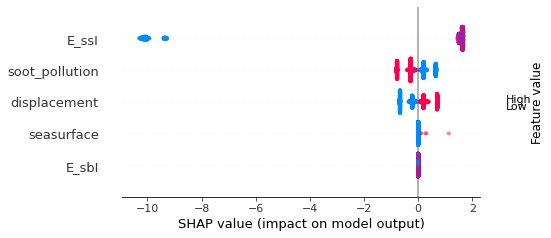

In [ ]:
shap.summary_plot(shap_values_isb,
                  features = X_train,
                  feature_names=X_train.columns,
                  max_display=5, alpha=0.5)

In [ ]:
# To control the color of Summary plot
# Ref: https://stackoverflow.com/questions/60153036/changing-the-gradient-color-of-shap-summary-plot-to-specific-2-or-3-rgb-grad
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

RGB_val = 255

color01= (220,220,220) # Black wanted
color04= (0,0,0)    # White wanted
Colors = [color01, color04]

# Creating a blue red palette transition for graphics
Colors= [(R/RGB_val,G/RGB_val,B/RGB_val) for idx, (R,G,B) in enumerate(Colors)]
n = 256

# Start of the creation of the gradient
Color01= ListedColormap(Colors[0], name='Color01', N=None)
Color04= ListedColormap(Colors[1], name='Color04', N=None)
top = cm.get_cmap(Color01,128)
bottom = cm.get_cmap(Color04,128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))

mymin0 = newcolors[0][0]
mymin1 = newcolors[0][1]
mymin2 = newcolors[0][2]
mymin3 = newcolors[0][3]
mymax0 = newcolors[255][0]
mymax1 = newcolors[255][1]
mymax2 = newcolors[255][2]
mymax3 = newcolors[255][3]

GradientBlueRed= [np.linspace(mymin0, mymax0,  n),
                   np.linspace(mymin1, mymax1,  n),
                   np.linspace(mymin2, mymax2,  n),
                   np.linspace(mymin3, mymax3,  n)]

GradientBlueRed_res =np.transpose(GradientBlueRed)

# End of the creation of the gradient

newcmp1 = ListedColormap(GradientBlueRed_res, name='BlueRed')

#----------------------------------- 2 -----------------
# Ref: https://stackoverflow.com/questions/60153036/changing-the-gradient-color-of-shap-summary-plot-to-specific-2-or-3-rgb-grad
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

RGB_val = 255

color01=  (242,220,220)# Black wanted
color04=  (128,0,0)   # White wanted
Colors = [color01, color04]

# Creating a blue red palette transition for graphics
Colors= [(R/RGB_val,G/RGB_val,B/RGB_val) for idx, (R,G,B) in enumerate(Colors)]
n = 256

# Start of the creation of the gradient
Color01= ListedColormap(Colors[0], name='Color01', N=None)
Color04= ListedColormap(Colors[1], name='Color04', N=None)
top = cm.get_cmap(Color01,128)
bottom = cm.get_cmap(Color04,128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))

mymin0 = newcolors[0][0]
mymin1 = newcolors[0][1]
mymin2 = newcolors[0][2]
mymin3 = newcolors[0][3]
mymax0 = newcolors[255][0]
mymax1 = newcolors[255][1]
mymax2 = newcolors[255][2]
mymax3 = newcolors[255][3]

GradientBlueRed= [np.linspace(mymin0, mymax0,  n),
                   np.linspace(mymin1, mymax1,  n),
                   np.linspace(mymin2, mymax2,  n),
                   np.linspace(mymin3, mymax3,  n)]

GradientBlueRed_res =np.transpose(GradientBlueRed)

# End of the creation of the gradient

newcmp2 = ListedColormap(GradientBlueRed_res, name='BlueRed')

# ----------------------- 3 ---------------------------
# Ref: https://stackoverflow.com/questions/60153036/changing-the-gradient-color-of-shap-summary-plot-to-specific-2-or-3-rgb-grad
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

RGB_val = 255

color01= (240,248,255)  # Black wanted
color04= (0,0,128)   # White wanted
Colors = [color01, color04]

# Creating a blue red palette transition for graphics
Colors= [(R/RGB_val,G/RGB_val,B/RGB_val) for idx, (R,G,B) in enumerate(Colors)]
n = 256

# Start of the creation of the gradient
Color01= ListedColormap(Colors[0], name='Color01', N=None)
Color04= ListedColormap(Colors[1], name='Color04', N=None)
top = cm.get_cmap(Color01,128)
bottom = cm.get_cmap(Color04,128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))

mymin0 = newcolors[0][0]
mymin1 = newcolors[0][1]
mymin2 = newcolors[0][2]
mymin3 = newcolors[0][3]
mymax0 = newcolors[255][0]
mymax1 = newcolors[255][1]
mymax2 = newcolors[255][2]
mymax3 = newcolors[255][3]

GradientBlueRed= [np.linspace(mymin0, mymax0,  n),
                   np.linspace(mymin1, mymax1,  n),
                   np.linspace(mymin2, mymax2,  n),
                   np.linspace(mymin3, mymax3,  n)]

GradientBlueRed_res =np.transpose(GradientBlueRed)

# End of the creation of the gradient

newcmp3 = ListedColormap(GradientBlueRed_res, name='BlueRed')



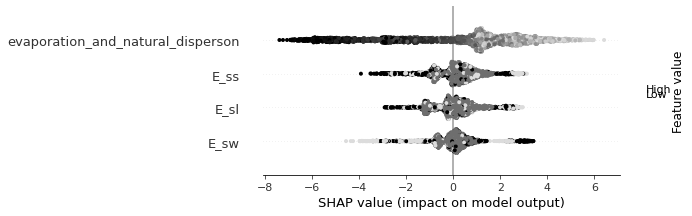

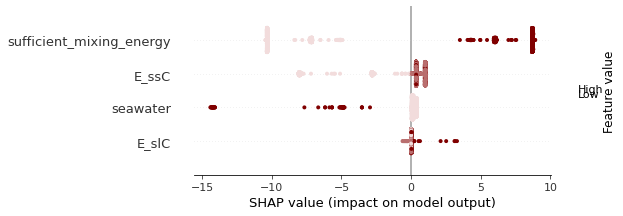

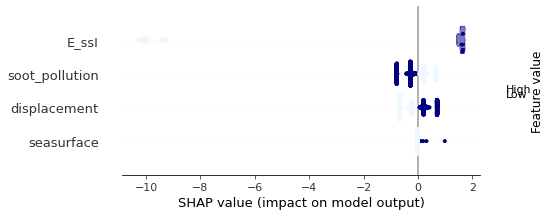

In [ ]:
# Plot the summary without showing it
plt.figure()
shap.summary_plot(shap_values_mcr,
                  features = X_train,
                  feature_names=X_train.columns,
                  plot_type='dot',
                  show=False, sort=True, max_display=4, alpha=1) #plot_size=0.9,

# Change the colormap of the artists
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newcmp1)
plt.savefig('Outputs/summary_plot_mcr_1.png', transparent=True)

plt.figure()
shap.summary_plot(shap_values_cdu,
                  features = X_train,
                  feature_names=X_train.columns,
                  show=False, sort=True, max_display=4, alpha=1) #plot_size=0.8,

# Change the colormap of the artists
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newcmp2)
plt.savefig('Outputs/summary_plot_isb_2.png', transparent=True)

plt.figure()
shap.summary_plot(shap_values_isb,
                  features = X_train,
                  feature_names=X_train.columns,
                  show=False, sort=True, max_display=4, alpha=1 ) #plot_size=0.9,  feature_names=X_train.columns

# Change the colormap of the artists
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newcmp3)

plt.savefig('Outputs/summary_plot_cdu_3.png', transparent=True)

#  Ref: https://shap-lrjball.readthedocs.io/en/docs_update/generated/shap.summary_plot.html

## Contribution of each feature

## Prediction probability: LIME

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
i = 20 # 3

explainer_mcr = LimeTabularExplainer(X_train.values, feature_names=X_train.columns,
                                 class_names=[10, 8, 2, -2], discretize_continuous=True, kernel_width=5)
exp_mcr = explainer_mcr.explain_instance(X_train.values[i], model_gnb_mcr.predict_proba, num_features=10)
exp_mcr.show_in_notebook(show_table=True, show_all=True)

explainer_cdu = LimeTabularExplainer(X_train.values, feature_names=X_train.columns,
                                 class_names=[10, 8, -2, -10], discretize_continuous=True, kernel_width=5)
exp_cdu = explainer_cdu.explain_instance(X_train.values[i], model_gnb_cdu.predict_proba, num_features=10)
exp_cdu.show_in_notebook(show_table=True, show_all=False)

explainer_isb = LimeTabularExplainer(X_train.values, feature_names=X_train.columns,
                                 class_names=[10, 8, -2], discretize_continuous=True, kernel_width=5)
exp_isb = explainer_isb.explain_instance(X_train.values[i], model_gnb_isb.predict_proba, num_features=10)
exp_isb.show_in_notebook(show_table=True, show_all=False)

# courtesy https://www.kdnuggets.com/2019/08/open-black-boxes-explainable-machine-learning.html

X does not have valid feature names, but GaussianNB was fitted with feature names


X does not have valid feature names, but GaussianNB was fitted with feature names


X does not have valid feature names, but GaussianNB was fitted with feature names


In [ ]:
GaussianNB

sklearn.naive_bayes.GaussianNB

In [ ]:
# multioutput classifier

In [ ]:
i = 20 # 3

explainer_mcr = LimeTabularExplainer(X_train.values, feature_names=X_train.columns,
                                 class_names=[10, 8, 2, -2], discretize_continuous=True, kernel_width=5)
exp_mcr = explainer_mcr.explain_instance(X_train.values[i], model_gnb_mcr.predict_proba, num_features=10)
exp_mcr.show_in_notebook(show_table=True, show_all=True)

## An illustrative example

# Reduced Model

## MCR

In [ ]:
# Data
X_reduced = X[['evaporation_and_natural_disperson','E_ss']]

# Binarize
y_c_b = label_binarize(y['MCR options'], classes=[10, 8, 2, -2])
n_classes = y_c_b.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_c_b, test_size=0.20, random_state=12)


In [ ]:
X_reduced2 = X[['evaporation_and_natural_disperson','oil_amount_to_recover']]

In [ ]:
X_reduced2

evaporation_and_natural_disperson  oil_amount_to_recover
Scene no.                                                           
Scene 1                              0.325843               0.911472
Scene 2                              0.483146               0.768039
Scene 3                              0.764045               0.080379
Scene 4                              0.910112               0.385508
Scene 5                              0.393258               0.335290
...                                       ...                    ...
Scene 3096                           0.539326               0.252365
Scene 3097                           0.449438               0.545030
Scene 3098                           0.483146               0.074920
Scene 3099                           0.606742               0.508780
Scene 3100                           0.112360               0.012823

[3100 rows x 2 columns]

In [ ]:
classifier_mcr = OneVsRestClassifier(GaussianNB()).fit(X_train, y_train)
y_score = classifier_mcr.predict_proba(X_test)
y_pred = classifier_mcr.predict(X_test)

### ROC curve

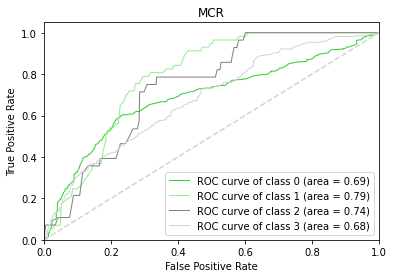

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig1_mcrReduced = plt.figure()

colors = cycle(['limegreen', 'lightgreen', 'gray', 'lightgray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "--", color='lightgray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("MCR")
plt.legend(loc="lower right")
plt.show()
fig1_mcrReduced.savefig('Outputs/ROC curve mcr reduced 1.png', dpi = 600)

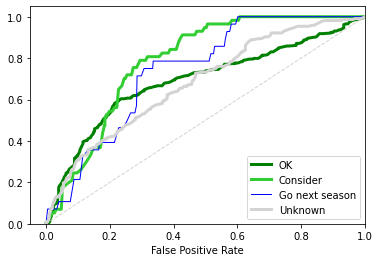

In [ ]:
#
fig2_reduced = plt.figure()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
color_c = ['green', 'limegreen', 'blue', 'lightgray']
class_c = ['OK', 'Consider', 'Go next season','Unknown']
lw = [3,3,1,3]
#linestyle = ['solid', 'dashed', '-.', '-.']
# opacity/ transparency in lineplot ++

for i, color in zip(range(n_classes), color_c):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw[i],
             label=class_c[i])
plt.plot([0, 1], [0, 1], '--', color= 'lightgray',lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")

plt.show()
fig2_reduced.savefig('Outputs/ROC curve MCR 1 reduced.png', dpi = 600)

### Explainer Dashbaord

In [ ]:
# data
# Data
X_reduced = X[['evaporation_and_natural_disperson','E_ss']]

# Binarize
y_mcr =y['MCR options']
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_mcr, test_size=0.20, random_state=12)


In [ ]:
from explainerdashboard import ClassifierExplainer, RegressionExplainer

explainer = ClassifierExplainer(classifier, X_test, y_test) #[:,0]

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


In [ ]:
from explainerdashboard import ExplainerDashboard
ExplainerDashboard(explainer).run()

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/620 [00:00<?, ?it/s]

Calculating prediction probabilities...
Calculating metrics...


C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

#### 2nd small

In [ ]:
explainer_mcr_reduced = shap.Explainer(classifier.predict, X_train)
shap_values_mcr = explainer_mcr_reduced(X_train)

In [ ]:
#explainer = shap.TreeExplainer(classifier)

In [ ]:
# Visualize the explanation of first prediction
shap.force_plot(explainer_mcr_reduced.expected_value[1], shap_values_mcr[0, :], X_train.iloc[0, :])

In [ ]:

#shap.plots.force(shap_values_mcr)
shap.plots.force(explainer_mcr_reduced.expected_value, shap_values)

In [ ]:
explainer_mcr = shap.Explainer(classifier.predict, X_train)
shap_values = explainer_mcr(X_train)

In [ ]:
# visualize the first prediction's explanation
#shap.plots.waterfall(shap_values[0])
shap.waterfall_plot(explainer_mcr.base_values[0], values[0], X[0])

In [ ]:
y['MCR options'].to_numpy().shape

## CDU

C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


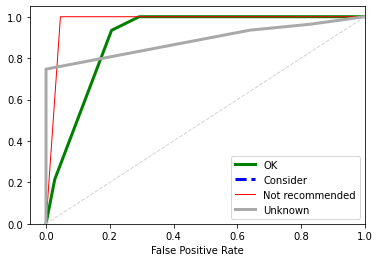

C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


{0: 0.896846304380551, 1: nan, 2: 0.9773869346733669, 3: 0.885659712018807}

In [ ]:
# Data
# CDU
X_reduced_cdu = X[['sufficient_mixing_energy','E_ssC']]
y_c_b = label_binarize(y['CDU options'], classes=[10, 8, -2, -10])
n_classes = y_c_b.shape[1]
X_train_cdu, X_test_cdu, y_train_cdu, y_test_cdu = train_test_split(X_reduced_cdu, y_c_b, test_size=0.20, random_state=12)

classifier = OneVsRestClassifier(GaussianNB()).fit(X_train_cdu, y_train_cdu)
y_score = classifier.predict_proba(X_test_cdu)
y_pred = classifier.predict(X_test_cdu)

fig2_reduced = plt.figure()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_cdu[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
color_c = ['green', 'blue', 'red', 'darkgray']
class_c = ['OK', 'Consider', 'Not recommended','Unknown']
linestyle = ['solid', 'dashed', 'solid', 'solid']
lw = [3,3,1,3]
# opacity/ transparency in lineplot ++

for i, color in zip(range(n_classes), color_c):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw[i], linestyle=linestyle[i],
             label=class_c[i])
plt.plot([0, 1], [0, 1], '--', color= 'lightgray',lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")

plt.show()
fig2_reduced.savefig('Outputs/ROC curve cdu 1 reduced.png', dpi = 600)

for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_cdu[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

roc_auc

In [ ]:
X.shape

In [ ]:

# CDU
classifier = OneVsRestClassifier(GaussianNB()).fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


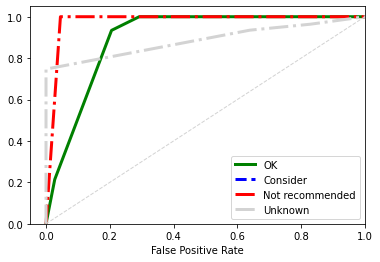

In [ ]:
#
fig2_reduced = plt.figure()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
color_c = ['green', 'blue', 'red', 'lightgray']
class_c = ['OK', 'Consider', 'Not recommended','Unknown']
linestyle = ['solid', 'dashed', '-.', '-.']
# opacity/ transparency in lineplot ++

for i, color in zip(range(n_classes), color_c):
    plt.plot(fpr[i], tpr[i], color=color, lw=3, linestyle=linestyle[i],
             label=class_c[i])
plt.plot([0, 1], [0, 1], '--', color= 'lightgray',lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")

plt.show()
fig2_reduced.savefig('Outputs/ROC curve cdu 1 reduced.png', dpi = 600)

In [ ]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_isb[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

roc_auc

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig3 = plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-avg (area = {0:0.2f})".format(roc_auc["micro"]),
    color="black",
    linestyle=":",
    linewidth=2,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-avg (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=2,
)

colors = cycle(['limegreen', 'lightgreen', 'gray', 'lightgray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=3,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "--", color='lightgray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("CDU")
plt.legend(loc="lower right")
plt.show()
fig3.savefig('Outputs/CDU curve 2 reduced.png', dpi = 600)

## ISB ROC Curve

In [ ]:
X_reduced_isb = X[['E_ssI','soot_pollution']]
y_i_b = label_binarize(y['ISB options'], classes=[10, 8, -2])
n_classes = y_i_b.shape[1]
X_train_isb, X_test_isb, y_train_isb, y_test_isb = train_test_split(X_reduced_isb, y_i_b, test_size=0.20, random_state=12)


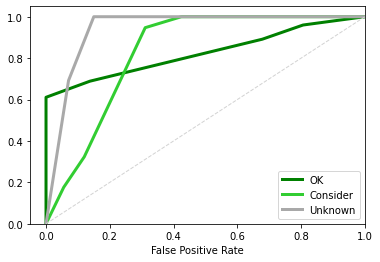

In [ ]:


# ISB
classifier = OneVsRestClassifier(GaussianNB()).fit(X_train_isb, y_train_isb)
y_score = classifier.predict_proba(X_test_isb)
y_pred = classifier.predict(X_test_isb)

fig4 = plt.figure()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_isb[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
color_i = ['green', 'limegreen',  'darkgray']
class_i = ['OK', 'Consider', 'Unknown']
linestyle = ['solid', 'solid', 'solid']

for i, color in zip(range(n_classes), color_i):
    plt.plot(fpr[i], tpr[i], color=color, lw=3,
             label=class_i[i], linestyle=linestyle[i])
plt.plot([0, 1], [0, 1], '--', lw=1, color='lightgray')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")

plt.show()
fig4.savefig('Outputs/ROC curve isb, reduced, name.png', dpi = 600)

# print roc values


In [ ]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_isb[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

roc_auc

{0: 0.8248700423565651, 1: 0.828313725490196, 2: 0.9415954415954415}

# Compare models

## Box plot

In [ ]:
# import data
X = pd.read_excel('Outputs/X.xlsx', index_col='Scene no.').copy()
y = pd.read_excel('Outputs/y.xlsx', index_col='Scene no.').copy()



In [ ]:
# MCR
# Data
X_reduced_mcr = X[['evaporation_and_natural_disperson','E_ss']]
y_m_b = label_binarize(y['MCR options'], classes=[10, 8, 2, -2])
n_classes = y_m_b.shape[1]
X_train_mcr, X_test_mcr, y_train_mcr, y_test_mcr = train_test_split(X_reduced_mcr, y_m_b, test_size=0.20, random_state=12)

# CDU
X_reduced_cdu = X[['sufficient_mixing_energy','E_ssC']]
y_c_b = label_binarize(y['CDU options'], classes=[10, 8, -2, -10])
n_classes = y_c_b.shape[1]
X_train_cdu, X_test_cdu, y_train_cdu, y_test_cdu = train_test_split(X_reduced_cdu, y_c_b, test_size=0.20, random_state=12)

# ISB
X_reduced_isb = X[['E_ssI','soot_pollution']]
y_i_b = label_binarize(y['ISB options'], classes=[10, 8, -2])
n_classes = y_i_b.shape[1]
X_train_isb, X_test_isb, y_train_isb, y_test_isb = train_test_split(X_reduced_isb, y_i_b, test_size=0.20, random_state=12)


In [ ]:
classifier_mcr = OneVsRestClassifier(GaussianNB()).fit(X_train_mcr, y_train_mcr)



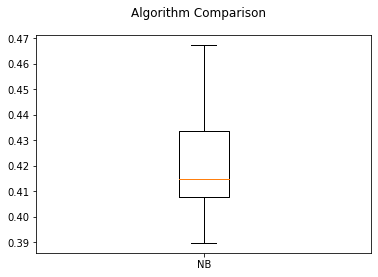

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import metrics

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
#models.append(('LR', LogisticRegression()))
models.append(('NB', OneVsRestClassifier(GaussianNB())))
# evaluate each model in turn
results = []
names = []
#scoring = metrics.label_ranking_average_precision_score
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results_m = model_selection.cross_val_score(model, X_reduced_mcr, y_m_b, cv=kfold, scoring='f1_samples') # , =scoring
	#cv_results2 = model_selection.cross_val_score(model, X_reduced_cdu, y_c_b, cv=kfold, scoring='roc_auc') # , =scoring
	results.append(cv_results_m)
	names.append(name)
    #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	#print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

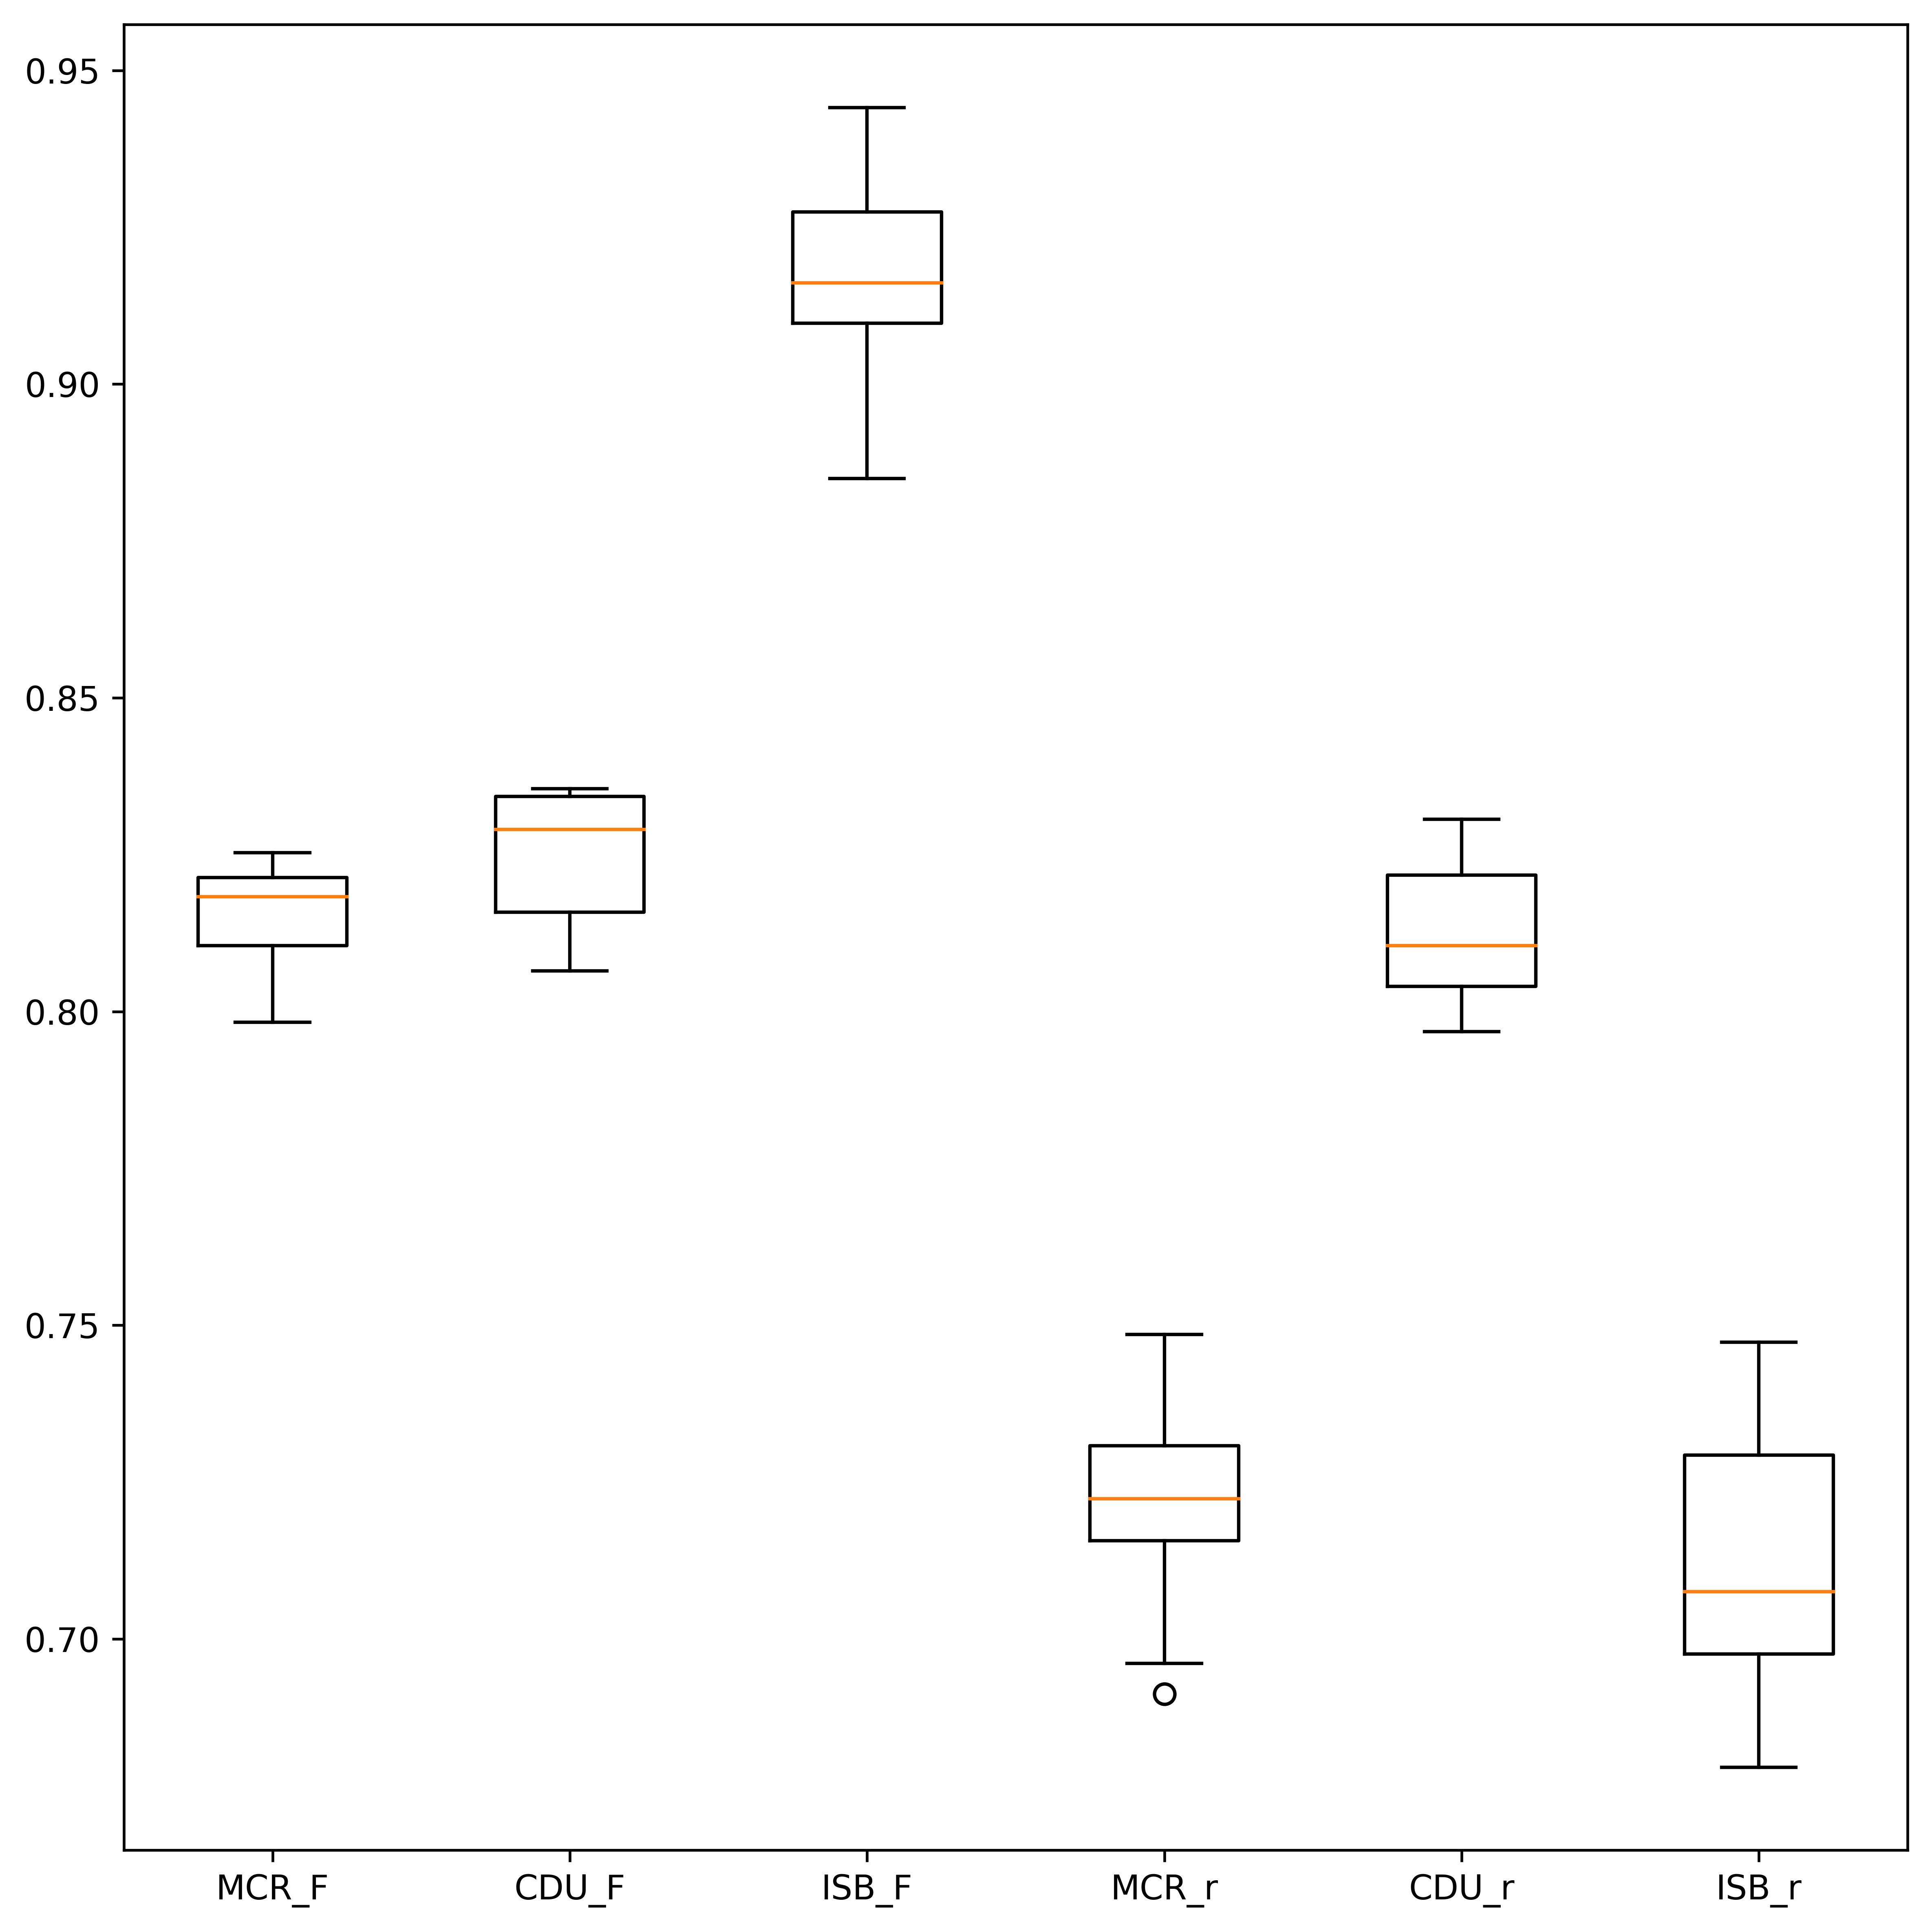

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import metrics

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
#models.append(('LR', LogisticRegression()))
models.append(('NB', OneVsRestClassifier(GaussianNB())))
# evaluate each model in turn
results = []
names = []
kfold = model_selection.KFold(n_splits=10)



cv_results_m = model_selection.cross_val_score(model, X, y_m_b, cv=kfold, scoring='roc_auc') # , =scoring
results.append(cv_results_m)
names.append('MCR_F')

cv_results_c = model_selection.cross_val_score(model, X, y_c_b, cv=kfold, scoring='f1_samples') # , =scoring
results.append(cv_results_c)
names.append('CDU_F')

cv_results_i = model_selection.cross_val_score(model, X, y_i_b, cv=kfold, scoring='f1_samples') # , =scoring
results.append(cv_results_i)
names.append('ISB_F')


cv_results_m2 = model_selection.cross_val_score(model, X_reduced_mcr, y_m_b, cv=kfold, scoring='roc_auc') # , =scoring
results.append(cv_results_m2)
names.append('MCR_r')

cv_results_c2 = model_selection.cross_val_score(model, X_reduced_cdu, y_c_b, cv=kfold, scoring='f1_samples') # , =scoring
results.append(cv_results_c2)
names.append('CDU_r')

cv_results_i2 = model_selection.cross_val_score(model, X_reduced_isb, y_i_b, cv=kfold, scoring='f1_samples') # , =scoring
results.append(cv_results_i2)
names.append('ISB_r')

# need to use same metric f1score, or roc_auc +++

# boxplot algorithm comparison
fig = plt.figure(figsize=(8, 8), dpi=600)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.tight_layout()
plt.show()
#plt.show()

0    0.815521
1    0.825215
2    0.917097
3    0.720974
4    0.812742
5    0.711720
dtype: float64

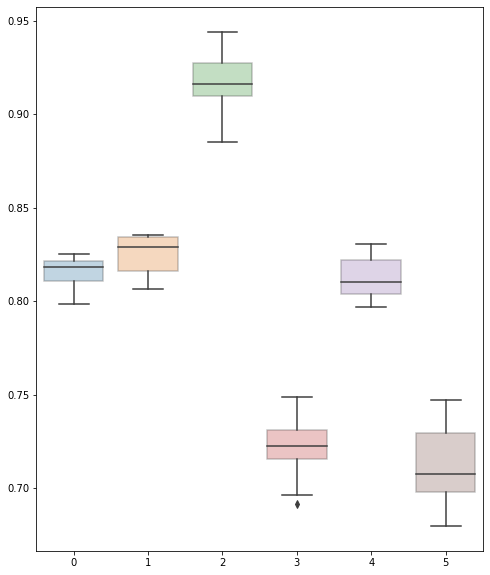

In [ ]:
#sns.boxplot(x=results, y=names, palette="Set3")
boxplot_df = pd.DataFrame(results).T

fig4, ax = plt.subplots(figsize=(8,10))

sns.boxplot(data=boxplot_df, boxprops=dict(alpha=.3))
fig4.savefig('Outputs/boxplot_.png', dpi = 600)

boxplot_df.mean(axis=0)

In [ ]:
#results.append(cv_results2)
    #cv_results2 = model_selection.cross_val_score(model, X_reduced_cdu, y_c_b, cv=kfold, scoring='accuracy') # , =scoring
